<a href="https://colab.research.google.com/github/williambrunos/Deep-Learning-Neuro-evolution/blob/main/First_Implementations/first_implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Implementations with tensorflow

## Abstract

This notebook tries to implement some neural netowork used to solve some problem and tries to evolve the weights of it using neural evolution, implemented with [tensorflow](https://www.tensorflow.org/probability/api_docs/python/tfp/optimizer/differential_evolution_minimize)

````Python
tfp.optimizer.differential_evolution_minimize(
    objective_function,
    initial_population=None,
    initial_position=None,
    population_size=50,
    population_stddev=1.0,
    max_iterations=100,
    func_tolerance=0,
    position_tolerance=1e-08,
    differential_weight=0.5,
    crossover_prob=0.9,
    seed=None,
    name=None
)
````

**obs**: if you read the documentation of this function, you'll see that the evolutionary algorithm will try to minimize the objective function, rather than maximize it. Because of this, it's important to implement a objective function with the negative value of the mathmatical expression.

"A candidate s_1 is considered better than s_2 if f(s_1) < f(s_2)." - The function documentation

We can use as a base example:

````Python
population_size = 40
  # With an initial population and a multi-part state.
  initial_population = (tf.random.normal([population_size]),
                        tf.random.normal([population_size]))
  def easom_fn(x, y):
    return -(tf.math.cos(x) * tf.math.cos(y) *
             tf.math.exp(-(x-np.pi)**2 - (y-np.pi)**2))

  optim_results = tfp.optimizer.differential_evolution_minimize(
      easom_fn,
      initial_population=initial_population,
      seed=43210)

  print(optim_results.converged)
  print(optim_results.position)  # Should be (close to) [pi, pi].
  print(optim_results.objective_value)    # Should be -1.


  # With a single starting point
  initial_position = (tf.constant(1.0), tf.constant(1.0))

  optim_results = tfp.optimizer.differential_evolution_minimize(
      easom_fn,
      initial_position=initial_position,
      population_size=40,
      population_stddev=2.0,
      seed=43210)
````

## Importações Necessárias

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Função de teste de tempo da evolução

In [2]:
def check_time_spent_by_evolutionary_algorithm(population_size,
                                               objective_function: object,
                                               max_iterations: int,
                                               variate_population_size: bool,
                                               seed=0):
  """
  This function must check the time spent by the evolutionary algorithm
  to upgrade the weights of a neural network according to some parameters
  given by the function.

  ----------------------
  PARAMS
  ---------------------

  - population_size: the number of weights of the neural network. Can be
  either a integer number or a list if the user want to variate the
  values of 'population_size' parameter to be tested.

  """

  list_of_times = []

  if ((variate_population_size == True) and (type(population_size) is list)):
    for size in population_size:
      initial_population = (tf.random.normal([size]))

      st = time.time()
      optim_results = tfp.optimizer.differential_evolution_minimize(
          objective_function=objective_function,
          initial_population=initial_population,
          max_iterations=max_iterations,
          seed=seed
      )
      et = time.time()
      time_taken = et - st
      list_of_times.append(time_taken)
  else:
    raise ValueError('If variate_population_size is True, then population_size must be a list of possible values')

  return list_of_times

### Implementando a função de teste

In [3]:
obj_func = lambda x: -(tf.math.sin(x) + tf.math.cos(x))
population_size_list = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

time_spent = check_time_spent_by_evolutionary_algorithm(population_size=population_size_list,
                                                        objective_function=obj_func, 
                                                        max_iterations=50,
                                                        variate_population_size=True,
                                                        seed=0)

### Visualizando os resultados

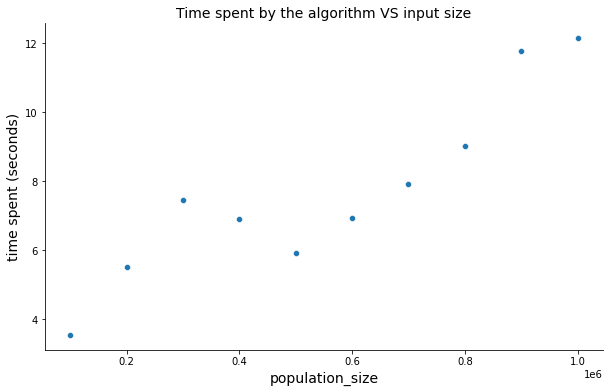

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.set_title('Time spent by the algorithm VS input size', fontsize=14)

ax.set_xlabel('population_size', fontsize=14)

ax.set_ylabel('time spent (seconds)', fontsize=14)
# ax.plot(population_size_list, time_spent)
sns.scatterplot(x=population_size_list, y=time_spent, ax=ax)

sns.despine()
plt.show()

##  Implementando uma rede neural

### Instanciando uma sequência de layers usando `tf.keras.Sequential`

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu', name='first_layer'),
    tf.keras.layers.Dense(8, activation='tanh', name='second_layer'),
    tf.keras.layers.Dense(3, name='last_layer')
])

### Buildando o modelo utilizando um input

In [12]:
input = tf.random.normal((1, 4))
output = model(input)
output

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.689204 ,  0.4824665, -0.5757222]], dtype=float32)>

### Iterando por todas as camadas do modelo

In [13]:
for layer in model.layers:
  print(layer.name, layer)

first_layer <keras.layers.core.dense.Dense object at 0x7fb026747910>
second_layer <keras.layers.core.dense.Dense object at 0x7fb026a5ed10>
last_layer <keras.layers.core.dense.Dense object at 0x7fb026747390>


### Obtendo pesos, viéses e inicializadores de viéses

In [17]:
# first layer
print('====FIRST LAYER====\n\n')
print(model.layers[0].weights)
print(model.layers[0].bias.numpy())
print(model.layers[0].bias_initializer)

# second layer
print('\n\n====SECOND LAYER====\n\n')
print(model.layers[1].weights)
print(model.layers[1].bias.numpy())
print(model.layers[1].bias_initializer)

# third layer
print('\n\n====THIRD LAYER====\n\n')
print(model.layers[2].weights)
print(model.layers[2].bias.numpy())
print(model.layers[2].bias_initializer)

====FIRST LAYER====


[<tf.Variable 'first_layer/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.36932117,  0.24458206, -0.72741735],
       [ 0.8882382 , -0.38577437, -0.8515855 ],
       [ 0.17715299, -0.7183629 ,  0.81258   ],
       [-0.70942986, -0.07228839,  0.8580239 ]], dtype=float32)>, <tf.Variable 'first_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
[0. 0. 0.]


====SECOND LAYER====


[<tf.Variable 'second_layer/kernel:0' shape=(3, 8) dtype=float32, numpy=
array([[-0.46052867,  0.58089334, -0.00527215,  0.50470585,  0.6277643 ,
         0.22184479, -0.5740326 ,  0.31442636],
       [-0.6058883 ,  0.01476073,  0.5811922 , -0.4788352 , -0.17661804,
        -0.04636091, -0.15856063, -0.6230401 ],
       [-0.43726763, -0.33413905, -0.39890814, -0.4120389 , -0.6695954 ,
         0.03814942, -0.1176694 ,  0.08401906]], dtype=float32)>, <tf.Variable 'second_layer/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0

### Obtendo os mesmos dados utilizando nomes das camadas

In [20]:
# firstlayer by name
print('====FIRST LAYER====\n\n')
print((model.get_layer("first_layer").weights))

# secondlayer by name
print('\n\n====SECOND LAYER====\n\n')
print((model.get_layer("second_layer").weights))

# lastlayer by name
print('\n\n====THIRD LAYER====\n\n')
print((model.get_layer("last_layer").weights))

====FIRST LAYER====


[<tf.Variable 'first_layer/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.36932117,  0.24458206, -0.72741735],
       [ 0.8882382 , -0.38577437, -0.8515855 ],
       [ 0.17715299, -0.7183629 ,  0.81258   ],
       [-0.70942986, -0.07228839,  0.8580239 ]], dtype=float32)>, <tf.Variable 'first_layer/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


====SECOND LAYER====


[<tf.Variable 'second_layer/kernel:0' shape=(3, 8) dtype=float32, numpy=
array([[-0.46052867,  0.58089334, -0.00527215,  0.50470585,  0.6277643 ,
         0.22184479, -0.5740326 ,  0.31442636],
       [-0.6058883 ,  0.01476073,  0.5811922 , -0.4788352 , -0.17661804,
        -0.04636091, -0.15856063, -0.6230401 ],
       [-0.43726763, -0.33413905, -0.39890814, -0.4120389 , -0.6695954 ,
         0.03814942, -0.1176694 ,  0.08401906]], dtype=float32)>, <tf.Variable 'second_layer/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=f

## Sandbox

Aqui vai qualquer coisa rs

In [5]:
population_size = 40
# With an initial population and a multi-part state.
initial_population = (tf.random.normal([population_size]))

print(f'initial pop: {initial_population}') 

def easom_fn(x):
  return -tf.math.sin(x)

st = time.time()

optim_results = tfp.optimizer.differential_evolution_minimize(
    easom_fn,
    initial_population=initial_population,
    max_iterations=50,
    seed=43210)

et = time.time()

time_spent = et - st 
print(f'time spent {time_spent}')

print(optim_results.converged)
print(optim_results.position)  # Should be (close to) [pi, pi].
print(optim_results.objective_value)    # Should be -1.
print(optim_results.final_population) # final population
print(optim_results.objective_value) # final value of objective fun. on the final position
print(optim_results.final_objective_values)

# With a single starting point
initial_position = (tf.constant(1.0))

optim_results = tfp.optimizer.differential_evolution_minimize(
                easom_fn,
                initial_position=initial_position,
                population_size=40,
                population_stddev=2.0,
                seed=43210)

initial pop: [-1.3061314   2.3557496   1.8312285  -1.6604831  -0.01182505 -0.45045286
 -0.597637   -0.13734196 -0.03861462 -0.0411884  -0.15150647 -0.45294732
  0.32212195  0.19396889 -0.34913233 -0.86359674  0.31918186 -0.41976953
 -0.98763764 -0.3959831   0.65994376 -0.73036766  0.33439612 -1.0468161
  0.7969334   0.31865653 -0.23182318  1.6789315  -0.27010462  0.5540344
  1.1317533  -0.22247714 -0.56144184  1.0222101   1.1715235   1.9027265
  0.02456379  0.6495049  -1.2601067  -0.38043153]
time spent 0.19843339920043945
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(1.5705839, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32)
tf.Tensor(
[1.5705839 1.5706471 1.5706676 1.5708414 1.5705614 1.5706904 1.5709729
 1.570833  1.5706089 1.5705928 1.570986  1.5708476 1.5705535 1.5709724
 1.5708673 1.5708464 1.5709207 1.5705713 1.5707812 1.57058   1.5708411
 1.5705996 1.5706189 1.5706971 1.5706797 1.5706513 1.5709368 1.570923
 1.570755  1.5708523 1.5706198 1.5705556 1.5707312 1

In [6]:
np.array(optim_results.position)

array(1.570732, dtype=float32)

## Referências

[Hot to get weights of layers in tensforflow ](https://www.gcptutorials.com/post/how-to-get-weights-of-layers-in-tensorflow)

[tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)